# Implementation, Analysis, Performance Evaluation and Comparison of Deep Convolutional Neural Networks for Image Classification

**Objective:** The objective of this project is to implement a deep convolutional neural network (CNN) for the identification of flower types. The provided dataset consists of five classes of flowers, namely chamomile, tulip, rose, sunflower, and dandelion. 

In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

import warnings
warnings.filterwarnings('ignore')

from tensorflow.keras.utils import set_random_seed

random_seed = 2024
set_random_seed(random_seed)

### **What is the total number of images in the dataset, and how are they distributed across the five flower types?**
There are 4317 images in the dataset. The distribution across the five flower types is {'dandelion': 1052, 'rose': 784, 'tulip': 984, 'daisy': 764, 'sunflower': 733}

In [2]:
#Step 1 implementation
# find the total number of images in flowers folder
import os

data_path = 'flowers'
label_dict = dict()
total_images = 0

for folder in os.listdir(data_path):
    label_dict[folder] = len(os.listdir(os.path.join(data_path, folder)))
    total_images += len(os.listdir(os.path.join(data_path, folder)))

print("Total number of images in dataset: ", total_images)

Total number of images in dataset:  4317


Number of images in each class:  {'tulip': 984, 'daisy': 764, 'sunflower': 733, 'dandelion': 1052, 'rose': 784}


<BarContainer object of 5 artists>

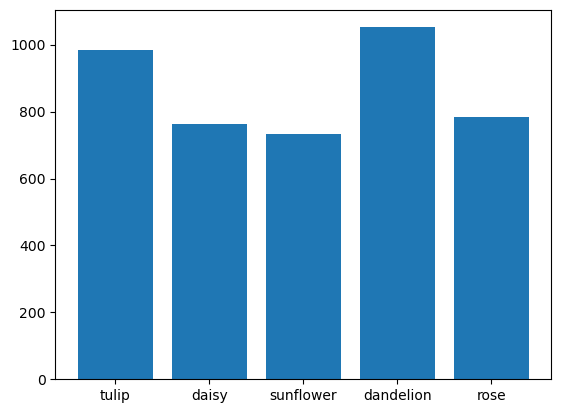

In [3]:
import matplotlib.pyplot as plt

print("Number of images in each class: ", label_dict)

plt.bar(label_dict.keys(), label_dict.values())

### **Do we need to implement techniques to balance the distribution of images across various flower types, such as oversampling or undersampling?**

When working with a dataset like this flower dataset, which is only slightly imbalanced, it is important to consider whether implementing techniques like sampling is necessary or beneficial. In cases where the imbalance is slight, the impact on model performance is often minimal. Implementing oversampling techniques in a dataset with only a slight imbalance could introduce a risk of overfitting. This happens because oversampling, by replicating minority class instances, can make the model overly familiar with specific instances, reducing its ability to generalize. Instead of sampling, data augmentation techniques can be used to increase the diversity of the training data, especially for image datasets. This can be a more effective way to improve model performance without explicitly addressing the slight imbalance.

### **What preprocessing techniques should be applied, such as resizing, normalization or standardization and why?**

I will resize the images to 224x224 dimensions, normalize pixel values to the range [0, 1], and apply data augmentation during model training.

- Resizing Images to 224x224 Dimensions: Resizing all images to a uniform size of 224x224 is essential for consistency, as it ensures that each input to your neural network has the same shape and size. This uniformity is crucial for the model to learn effectively. Additionally, 224x224 is a common dimension used in many pre-trained models (like VGG16, ResNet), making it a practical choice if you plan to use transfer learning or benchmark against these models.

- Normalizing Pixel Values to the Range [0, 1]: Normalization is a crucial step in image preprocessing. By scaling pixel values to a range of [0, 1], you reduce the variability in the dataset, which can help speed up the training process and improve the model's performance. Normalizing the data makes the network less sensitive to the scale of features, thus leading to more stable and faster convergence during training.

- Applying Data Augmentation During Model Training: Data augmentation is a powerful technique to increase the diversity of your training data without actually collecting new images. By artificially augmenting the dataset through transformations like rotation, scaling, flipping, and shifting, you can simulate different perspectives and variations. This helps in making the model more robust and less prone to overfitting, as it learns to recognize flowers in various orientations and conditions. It is particularly useful in scenarios like this where the dataset may not cover all possible variations of the subject matter.

### **How would you split the dataset into training, validation and testing sets, and in what ratios?**
I would divide the dataset into training and validation sets in an 0.8:0.2 ratio. Since a testing set is not necessary for this project, which primarily focuses on comparing different models, I will not create a testing set.

In [5]:
print("Splitting dataset into train, validation and test sets with ratio (0.8:0.2)")

import splitfolders

splitfolders.ratio(data_path, output="dataset", seed=2023, ratio=(0.8, 0.2), group_prefix=None)

Splitting dataset into train, validation and test sets with ratio (0.8:0.2)


**2. Implement the given CNN architecture. Make necessary changes in the final layers for it to work on the number of classes in the given dataset. Use an input image size of $224 \times 224 \times 3$**

<img src='CNN.png' alt='given CNN'>

In [6]:
#Step 2 implementation 
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout

model = Sequential()

model.add(Conv2D(64, (3, 3), activation='selu', padding='same', kernel_initializer='he_normal', input_shape=(224, 224, 3)))
model.add(Conv2D(64, (3, 3), activation='selu', padding='same', kernel_initializer='he_normal'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='selu', padding='same', kernel_initializer='he_normal'))
model.add(Conv2D(128, (3, 3), activation='selu', padding='same', kernel_initializer='he_normal'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(256, (3, 3), activation='selu', padding='same', kernel_initializer='he_normal'))
model.add(Conv2D(256, (3, 3), activation='selu', padding='same', kernel_initializer='he_normal'))
model.add(Conv2D(256, (3, 3), activation='selu', padding='same', kernel_initializer='he_normal'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(512, (3, 3), activation='selu', padding='same', kernel_initializer='he_normal'))
model.add(Conv2D(512, (3, 3), activation='selu', padding='same', kernel_initializer='he_normal'))
model.add(Conv2D(512, (3, 3), activation='selu', padding='same', kernel_initializer='he_normal'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(512, (3, 3), activation='selu', padding='same', kernel_initializer='he_normal'))
model.add(Conv2D(512, (3, 3), activation='selu', padding='same', kernel_initializer='he_normal'))
model.add(Conv2D(512, (3, 3), activation='selu', padding='same', kernel_initializer='he_normal'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Flatten())
model.add(Dense(4096, activation='selu', kernel_initializer='he_normal'))
model.add(Dense(4096, activation='selu', kernel_initializer='he_normal'))
model.add(Dense(5, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 64)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 128)       0         
 g2D)                                                   

### **What is your approach for selecting the appropriate hyperparameters for the model training, such as the learning rate, number of epochs, batch size, and optimizer?**

In general, we can select our appropriate hyperparameters through the performance of validation set. I would select my hyperparameters by considering following:

Learning Rate:
- I will begin with a lower learning rate of 0.0001 and fine-tune it as necessary.

- Also use adaptive learning rate optimizers like Adam, which adjust the learning rate during training.

Number of Epochs:
- I would begin with a moderate number, such as 30-50 epochs (fine-tune it as necessary), and monitor the validation loss and accuracy

Batch Size:
- The choice of batch size often depends on memory constraints. For architectures like VGG, typical batch sizes range from 16 to 128.

- I would start with a smaller batch size e.g. 32, which can provide a regularizing effect and lower generalization error.

Optimizer:
- I would start with Adam optimizer as it combines the best properties of the Adagrad and RMSprop algorithms. It adjusts the learning rate during training, which makes it efficient and requires less hyperparameter tuning.

- However, for deeper networks, SGD with momentum can sometimes outperform Adam. I might want to start with Adam for initial epochs and then switch to SGD for finer tuning if I want to push higher performance.

Activation Function:
- I would use Scaled Exponential Linear Units (SELU) as activation function, since the given CNN architecture is quite deep without any batch normalization or other structure to deal with vanishing gradient problem. otherwise, the deep network cannot be trained.

Weight Initialization: 
- I would use He initialization (he_normal in Keras) for SELU activated units. It can help the vanishing gradient problem mentioned above. 

- Proper weight initialization can speed up the training process.

### **What methods do you use for monitoring the training progress and performance of the model and why?**

I would use Loss and Accuracy Curves:

- By plotting training and validation loss and accuracy over epochs, one can visually inspect how the model is learning.

- A divergence between training and validation metrics might indicate overfitting.

- If both training and validation loss are high, the model might be underfitting.

I would use Early Stopping as necessary:

- Monitor validation loss and stop training once that it stops improving for a certain number of epochs (patience).

- This helps in preventing overfitting and reduces computational costs.

### **What metrics would you prefer to measure the performance, such as accuracy, precision, recall, F1 score, or ROC-AUC and why?**

I would use accuracy as the primary metric for evaluating performance on a relatively balanced dataset like the flower dataset for several reasons:

- Direct Representation of Success Rate: Accuracy provides a straightforward measure of how often the model is correct in its predictions. In a balanced dataset, where each class is equally represented, accuracy effectively captures the model's overall success rate across all classes. This makes it an intuitive and easily interpretable metric for assessing the model's performance.

- Fair Class Representation: Since the dataset is quite balanced, with each class of flowers having a roughly equal number of instances, the risk of accuracy being skewed by a dominant class is minimized. In imbalanced datasets, accuracy can be misleading because high accuracy could be achieved by simply favoring the majority class. However, in this case, the balanced nature ensures that accuracy is a fair representation of the model's ability to classify all classes effectively.

- Simplicity and Efficiency: With a balanced dataset, accuracy becomes a more reliable metric. It will give a clear picture of how well the model is performing across all classes since no class is now underrepresented. If the model achieves a high accuracy, it means it is performing well across all flower types.

Precision, Recall, and F1 Score:
- Even with a balanced dataset, these metrics are beneficial to understand the model's behavior for each class. Precision will inform us how many of the predicted images for each flower type are actually correct, while recall will let us know how many of the actual images of each flower type the model correctly identified. The F1 score harmonizes precision and recall.

- For instance, if 'sunflower' images are often misclassified as 'daisy', even in a balanced dataset, we will see a drop in precision for 'daisy' and a drop in recall for 'sunflower'.

In [2]:
#Step 3 implementation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
import time

train_dir = 'dataset/train/'
val_dir = 'dataset/val/'

BATCH_SIZE = 32
EPOCHS = 50

train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    width_shift_range=0.2,
    height_shift_range=0.2)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=BATCH_SIZE,
    class_mode='categorical')

val_datagen = ImageDataGenerator(rescale=1./255)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=BATCH_SIZE,
    class_mode='categorical')

Found 3452 images belonging to 5 classes.


Found 865 images belonging to 5 classes.


In [8]:
checkpoint_filepath = 'best_model_baseline.h5'
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

start_time = time.time()

history_1 = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=val_generator,
    validation_steps=val_generator.samples // BATCH_SIZE,
    callbacks=[model_checkpoint_callback])

end_time = time.time()
print(f"Total training time of baseline model: {end_time - start_time} seconds")

model.save('model_baseline.h5')

Epoch 1/50
107/107 [==============================] - 24s 180ms/step - loss: 16.9672 - accuracy: 0.2632 - val_loss: 1.8233 - val_accuracy: 0.3414
Epoch 2/50
107/107 [==============================] - 16s 151ms/step - loss: 1.8303 - accuracy: 0.4222 - val_loss: 1.9900 - val_accuracy: 0.4097
Epoch 3/50
107/107 [==============================] - 16s 152ms/step - loss: 1.5017 - accuracy: 0.4865 - val_loss: 1.5262 - val_accuracy: 0.4873
Epoch 4/50
107/107 [==============================] - 16s 151ms/step - loss: 1.4381 - accuracy: 0.5061 - val_loss: 1.3087 - val_accuracy: 0.5000
Epoch 5/50
107/107 [==============================] - 16s 151ms/step - loss: 1.4481 - accuracy: 0.5251 - val_loss: 1.1629 - val_accuracy: 0.5856
Epoch 6/50
107/107 [==============================] - 15s 141ms/step - loss: 1.2916 - accuracy: 0.5544 - val_loss: 1.4303 - val_accuracy: 0.5150
Epoch 7/50
107/107 [==============================] - 15s 140ms/step - loss: 1.2829 - accuracy: 0.5515 - val_loss: 1.3596 - val_a

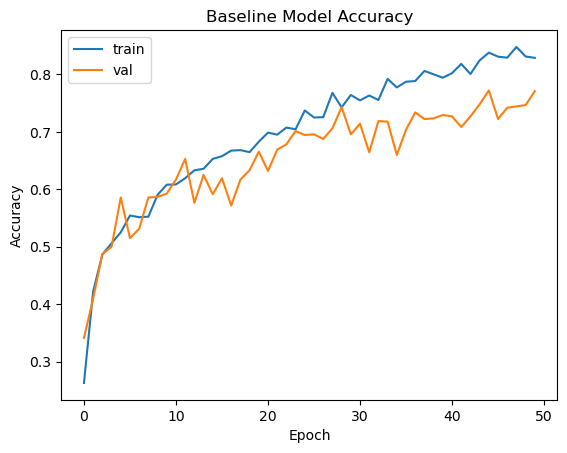

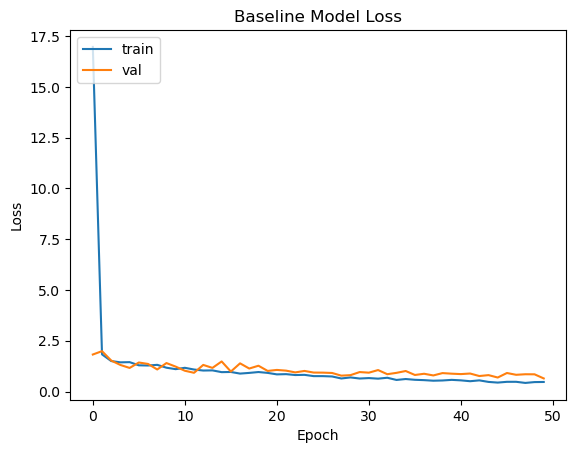

In [9]:
# plot the training and validation accuracy and loss at each epoch
import matplotlib.pyplot as plt

plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Baseline Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('Baseline Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### **What is the final accuracy of the model on the validation set, and how does it compare to the training accuracy?**
The final accuracy of the model on validation set is around 0.77, whereas the training accruacy is around 0.82.

### **What is the confusion matrix for the model on the validation set, and which flower types are the most difficult to classify?**

Found 865 images belonging to 5 classes.
28/28 [==============================] - 3s 40ms/step
Accuracy: 77.23%
Precision: 0.77
Recall: 0.77
F1 Score: 0.77


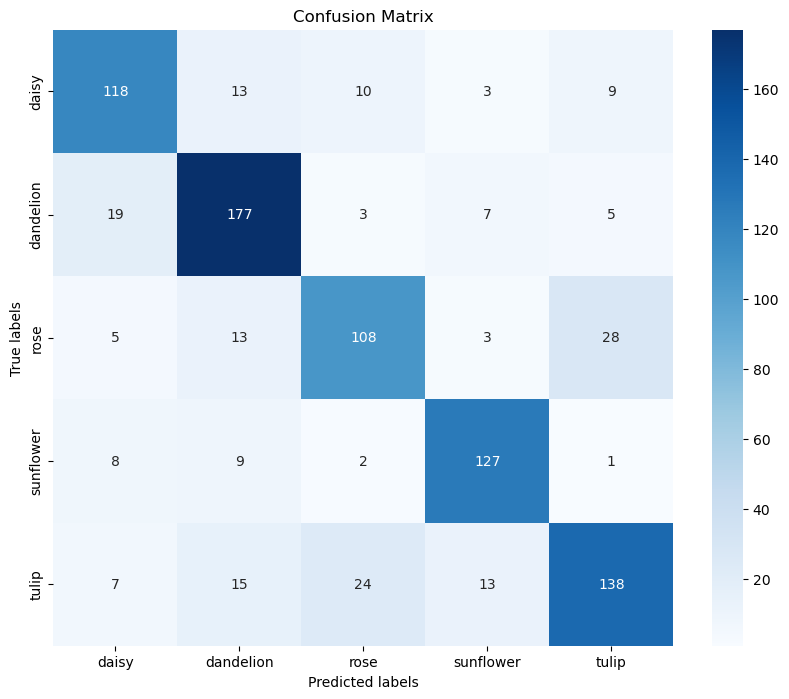

According to the confusion matrix, tulip is the most difficult flower types to classify.


In [3]:
#Step 4 implementation
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

model = tf.keras.models.load_model('best_model_baseline.h5')

val_datagen = ImageDataGenerator(rescale=1./255)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False)

predictions = model.predict(val_generator)
predicted_classes = np.argmax(predictions, axis=1)

true_classes = val_generator.classes

accuracy = accuracy_score(true_classes, predicted_classes)
precision = precision_score(true_classes, predicted_classes, average='macro')
recall = recall_score(true_classes, predicted_classes, average='macro')
f1 = f1_score(true_classes, predicted_classes, average='macro')

print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

conf_matrix = confusion_matrix(true_classes, predicted_classes)

class_labels = list(val_generator.class_indices.keys())

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

print("According to the confusion matrix, tulip is the most difficult flower types to classify.")

### **How does the model perform on individual flower types, and are there any particular images that the model struggles to classify?**

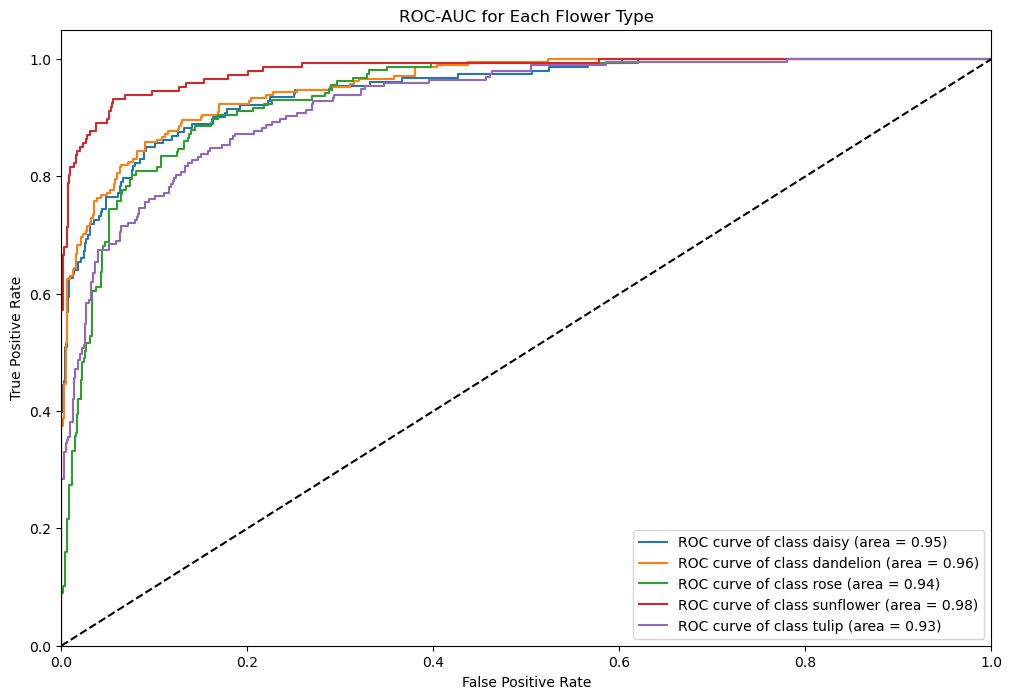

In [11]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

y_true_one_hot = label_binarize(val_generator.classes, classes=[0, 1, 2, 3, 4]) 
n_classes = y_true_one_hot.shape[1]

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_one_hot[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(12, 8))
for i, class_label in enumerate(val_generator.class_indices.keys()):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve of class {class_label} (area = {roc_auc[i]:.2f})')
    
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC for Each Flower Type')
plt.legend(loc="lower right")
plt.show()

These are the images that the model struggles to classify: 


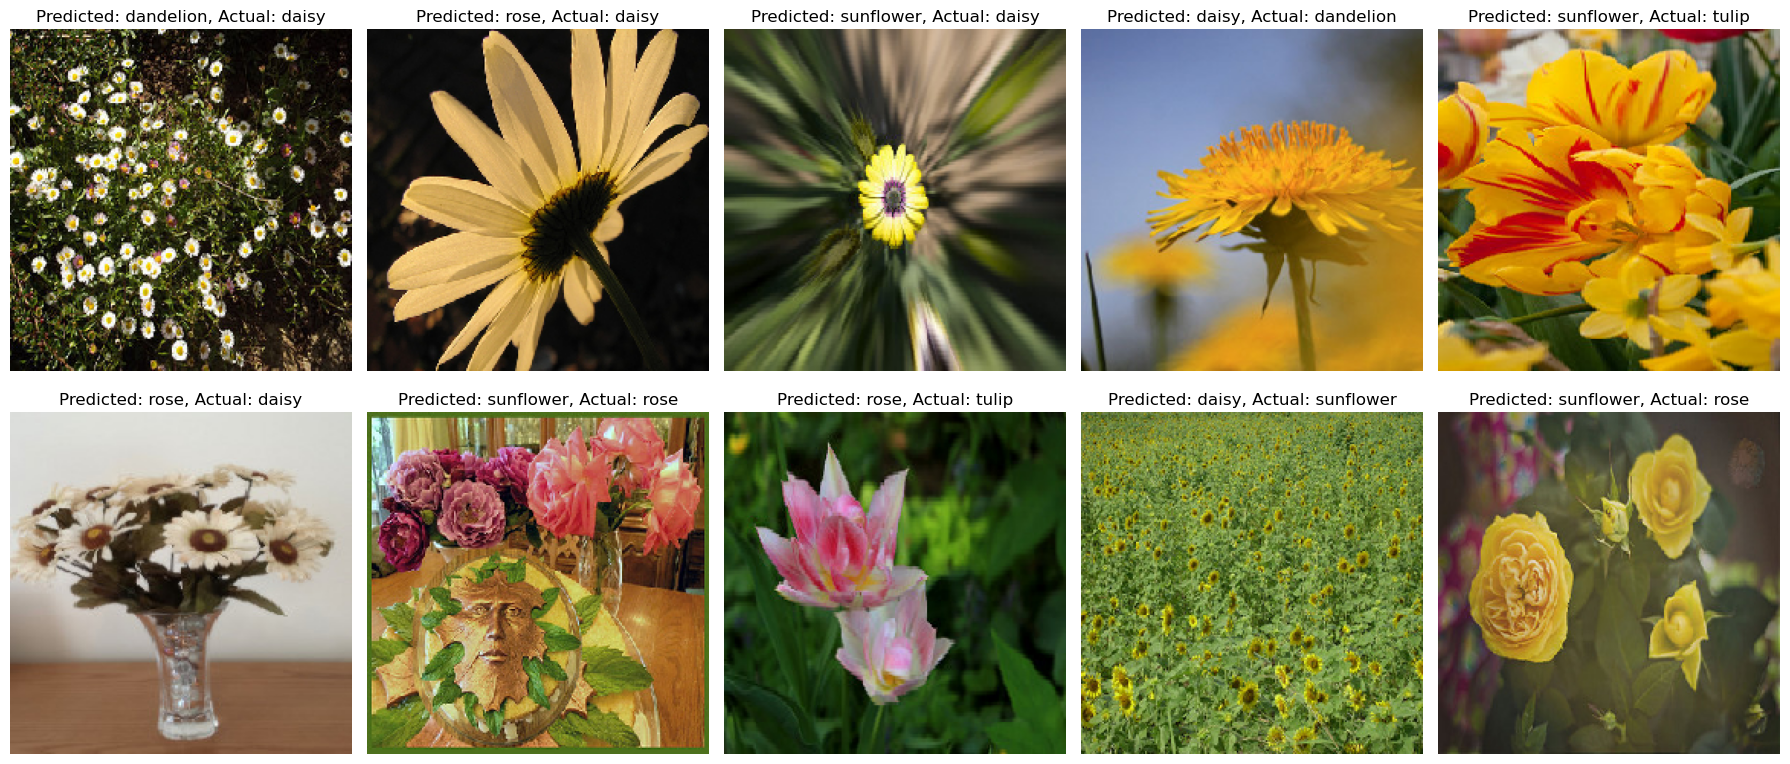

In [12]:
incorrect_indices = np.nonzero(predicted_classes != true_classes)[0]

incorrect_confidences = predictions[incorrect_indices, predicted_classes[incorrect_indices]]
lowest_confidence_indices = incorrect_indices[np.argsort(incorrect_confidences)[:10]]

print("These are the images that the model struggles to classify: ")

plt.figure(figsize=(18, 8))
for i, incorrect in enumerate(lowest_confidence_indices):
    plt.subplot(2, 5, i + 1)
    img = val_generator[incorrect // val_generator.batch_size][0][incorrect % val_generator.batch_size]
    plt.imshow(img)
    plt.title(f"Predicted: {class_labels[predicted_classes[incorrect]]}, Actual: {class_labels[true_classes[incorrect]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

### **Is the model's large size contributing to any challenges or constraints in its performance on the given dataset?**

There are few challenges and constraints that I faced in training this flower dataset with given CNN architecture.

**Vanishing Gradient Problem:**
 - At the beginning of training this model, I faced a serious vanishing gradient problem. The gradients could not backpropagate effectively, making the model untrainable. Deep networks, especially those without skip connections or normalization layers, are prone to this problem. As gradients are backpropagated through layers, they can become very small, essentially "vanishing," making it hard to train the deeper layers of the network. This issue can still occur with ReLU, especially in very deep architectures like yours, despite ReLU being designed to mitigate this problem to some extent. Later, the model can finally be trained when I used He Initialization and SELU Activation.

**Overfitting:**
 - A model with a large number of parameters has higher capacity and can easily memorize the training data, especially if the dataset is not large enough. This results in poor generalization to new, unseen data. For instance, this flower dataset has 4317 samples which is not large enough to train this kind of deep complex model. We can use transfer learning to improve the performance.

**Training Time:**
 - A larger model requires more computation, leading to longer training times. This can be a constraint if I am iterating over different models or hyperparameters.

## **Test the model by giving it a picture taken by my own phone camera.**


### **How can the accuracy of the model on the picture taken by your own phone camera be evaluated?**
- Load the photo.
- Preprocess the image to make it suitable for the model.
- Load the baseline model.
- Make a prediction.

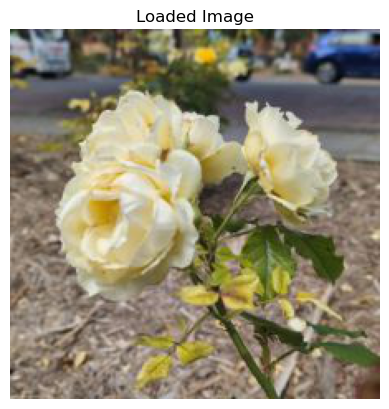

1/1 [==============================] - 0s 52ms/step
The image is most likely a rose with a probability of 0.69.
The true label is rose.


In [14]:
#Step 5 implementation
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

img_path = 'photo_rose.jpg'
img = image.load_img(img_path, target_size=(224, 224))

plt.imshow(img)
plt.title("Loaded Image")
plt.axis('off')
plt.show()

img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

model = load_model('best_model_baseline.h5')

predictions = model.predict(img_array)
predicted_class = np.argmax(predictions[0])

class_labels = list(val_generator.class_indices.keys())

print(f"The image is most likely a {class_labels[predicted_class]} with a probability of {predictions[0][predicted_class]:.2f}.")
print("The true label is rose.")

### **What can be done if the model does not perform well on the picture taken by your own phone camera?**

We can consider few points if the model does not perform well on the picture taken by own phone camera:


- Image Quality: Check if the image quality, lighting, or focus is drastically different from the images in your dataset. The model will likely perform better on high-quality images that resemble the training data.


- Augmentation and Diversity: Ensure that the training dataset has a diverse set of images. If possible, augment the training set with images taken under conditions similar to my phone camera.


- Transfer Learning: Consider using a pre-trained model and fine-tuning it on the dataset. These models are trained on millions of images and might generalize better to new images.


- Data Collection: Collect more real-world samples, like the ones from my phone camera, and include them in the training or fine-tuning process.

### **Build L2 regularization model**

In [15]:
#Step 6 implementation
# build a L2 regularized model

from tensorflow.keras.regularizers import l2

l2_lambda = 0.01

model_l2 = Sequential()

model_l2.add(Conv2D(64, (3, 3), activation='selu', padding='same', kernel_initializer='he_normal', kernel_regularizer=l2(l2_lambda), input_shape=(224, 224, 3)))
model_l2.add(Conv2D(64, (3, 3), activation='selu', padding='same', kernel_initializer='he_normal', kernel_regularizer=l2(l2_lambda)))
model_l2.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model_l2.add(Conv2D(128, (3, 3), activation='selu', padding='same', kernel_initializer='he_normal', kernel_regularizer=l2(l2_lambda)))
model_l2.add(Conv2D(128, (3, 3), activation='selu', padding='same', kernel_initializer='he_normal', kernel_regularizer=l2(l2_lambda)))
model_l2.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model_l2.add(Conv2D(256, (3, 3), activation='selu', padding='same', kernel_initializer='he_normal', kernel_regularizer=l2(l2_lambda)))
model_l2.add(Conv2D(256, (3, 3), activation='selu', padding='same', kernel_initializer='he_normal', kernel_regularizer=l2(l2_lambda)))
model_l2.add(Conv2D(256, (3, 3), activation='selu', padding='same', kernel_initializer='he_normal', kernel_regularizer=l2(l2_lambda)))
model_l2.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model_l2.add(Conv2D(512, (3, 3), activation='selu', padding='same', kernel_initializer='he_normal', kernel_regularizer=l2(l2_lambda)))
model_l2.add(Conv2D(512, (3, 3), activation='selu', padding='same', kernel_initializer='he_normal', kernel_regularizer=l2(l2_lambda)))
model_l2.add(Conv2D(512, (3, 3), activation='selu', padding='same', kernel_initializer='he_normal', kernel_regularizer=l2(l2_lambda)))
model_l2.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model_l2.add(Conv2D(512, (3, 3), activation='selu', padding='same', kernel_initializer='he_normal', kernel_regularizer=l2(l2_lambda)))
model_l2.add(Conv2D(512, (3, 3), activation='selu', padding='same', kernel_initializer='he_normal', kernel_regularizer=l2(l2_lambda)))
model_l2.add(Conv2D(512, (3, 3), activation='selu', padding='same', kernel_initializer='he_normal', kernel_regularizer=l2(l2_lambda)))
model_l2.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model_l2.add(Flatten())
model_l2.add(Dense(4096, activation='selu', kernel_initializer='he_normal', kernel_regularizer=l2(l2_lambda)))
model_l2.add(Dense(4096, activation='selu', kernel_initializer='he_normal', kernel_regularizer=l2(l2_lambda)))
model_l2.add(Dense(5, activation='softmax'))

model_l2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 conv2d_14 (Conv2D)          (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 112, 112, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 112, 112, 128)     73856     
                                                                 
 conv2d_16 (Conv2D)          (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 56, 56, 128)       0         
 g2D)                                                 

In [16]:
from tensorflow.keras.callbacks import ModelCheckpoint
import time

checkpoint_filepath = 'best_model_l2.h5'
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)


model_l2.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

start_time = time.time()

history_l2 = model_l2.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=val_generator,
    validation_steps=val_generator.samples // BATCH_SIZE,
    callbacks=[model_checkpoint_callback])

end_time = time.time()
print(f"Total training time of L2 model: {end_time - start_time} seconds")

model_l2.save('model_l2.h5')

Epoch 1/50
107/107 [==============================] - 18s 148ms/step - loss: 262.2380 - accuracy: 0.3064 - val_loss: 244.0438 - val_accuracy: 0.4792
Epoch 2/50
107/107 [==============================] - 15s 141ms/step - loss: 240.2533 - accuracy: 0.4599 - val_loss: 236.3205 - val_accuracy: 0.4051
Epoch 3/50
107/107 [==============================] - 15s 141ms/step - loss: 231.8083 - accuracy: 0.4789 - val_loss: 227.1729 - val_accuracy: 0.4630
Epoch 4/50
107/107 [==============================] - 15s 140ms/step - loss: 222.4847 - accuracy: 0.5208 - val_loss: 218.1884 - val_accuracy: 0.4317
Epoch 5/50
107/107 [==============================] - 16s 150ms/step - loss: 213.0461 - accuracy: 0.5260 - val_loss: 208.0924 - val_accuracy: 0.5764
Epoch 6/50
107/107 [==============================] - 15s 140ms/step - loss: 203.4237 - accuracy: 0.5570 - val_loss: 198.8538 - val_accuracy: 0.5104
Epoch 7/50
107/107 [==============================] - 16s 150ms/step - loss: 193.9148 - accuracy: 0.5699 -

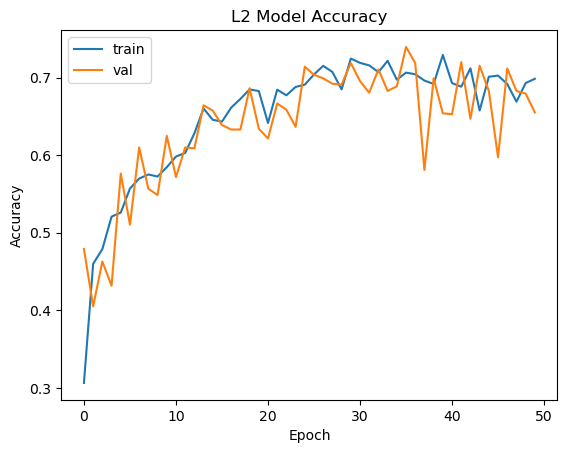

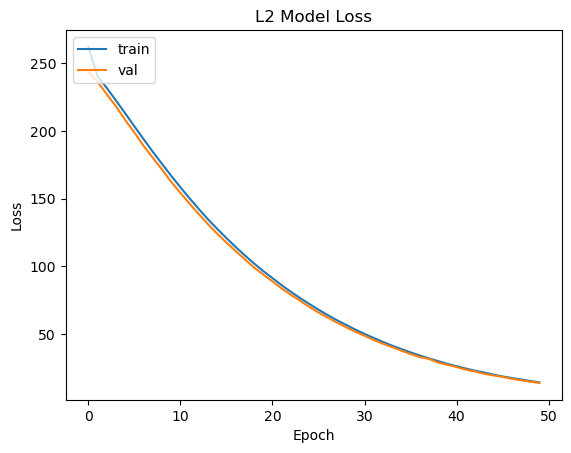

In [17]:
# plot the training and validation accuracy and loss at each epoch
import matplotlib.pyplot as plt

plt.plot(history_l2.history['accuracy'])
plt.plot(history_l2.history['val_accuracy'])
plt.title('L2 Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history_l2.history['loss'])
plt.plot(history_l2.history['val_loss'])
plt.title('L2 Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### **Build batch normalization model**

In [18]:
# build a batch normalization model
from tensorflow.keras.layers import BatchNormalization

model_bn = Sequential()

model_bn.add(Conv2D(64, (3, 3), activation='selu', padding='same', kernel_initializer='he_normal', input_shape=(224, 224, 3)))
model_bn.add(Conv2D(64, (3, 3), activation='selu', padding='same', kernel_initializer='he_normal'))
model_bn.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_bn.add(BatchNormalization())

model_bn.add(Conv2D(128, (3, 3), activation='selu', padding='same', kernel_initializer='he_normal'))
model_bn.add(Conv2D(128, (3, 3), activation='selu', padding='same', kernel_initializer='he_normal'))
model_bn.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_bn.add(BatchNormalization())

model_bn.add(Conv2D(256, (3, 3), activation='selu', padding='same', kernel_initializer='he_normal'))
model_bn.add(Conv2D(256, (3, 3), activation='selu', padding='same', kernel_initializer='he_normal'))
model_bn.add(Conv2D(256, (3, 3), activation='selu', padding='same', kernel_initializer='he_normal'))
model_bn.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_bn.add(BatchNormalization())

model_bn.add(Conv2D(512, (3, 3), activation='selu', padding='same', kernel_initializer='he_normal'))
model_bn.add(Conv2D(512, (3, 3), activation='selu', padding='same', kernel_initializer='he_normal'))
model_bn.add(Conv2D(512, (3, 3), activation='selu', padding='same', kernel_initializer='he_normal'))
model_bn.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_bn.add(BatchNormalization())

model_bn.add(Conv2D(512, (3, 3), activation='selu', padding='same', kernel_initializer='he_normal'))
model_bn.add(Conv2D(512, (3, 3), activation='selu', padding='same', kernel_initializer='he_normal'))
model_bn.add(Conv2D(512, (3, 3), activation='selu', padding='same', kernel_initializer='he_normal'))
model_bn.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_bn.add(BatchNormalization())

model_bn.add(Flatten())
model_bn.add(Dense(4096, activation='selu', kernel_initializer='he_normal'))
model_bn.add(Dense(4096, activation='selu', kernel_initializer='he_normal'))
model_bn.add(Dense(5, activation='softmax'))

model_bn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 conv2d_27 (Conv2D)          (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 112, 112, 64)      0         
 ng2D)                                                           
                                                                 
 batch_normalization (Batch  (None, 112, 112, 64)      256       
 Normalization)                                                  
                                                                 
 conv2d_28 (Conv2D)          (None, 112, 112, 128)     73856     
                                                                 
 conv2d_29 (Conv2D)          (None, 112, 112, 128)    

In [19]:
from tensorflow.keras.callbacks import ModelCheckpoint
import time

checkpoint_filepath = 'best_model_bn.h5'
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)


model_bn.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

start_time = time.time()

history_bn = model_bn.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=val_generator,
    validation_steps=val_generator.samples // BATCH_SIZE,
    callbacks=[model_checkpoint_callback])

end_time = time.time()
print(f"Total training time of batch normalization model: {end_time - start_time} seconds")

model_bn.save('model_bn.h5')

Epoch 1/50
107/107 [==============================] - 17s 142ms/step - loss: 6.4988 - accuracy: 0.4137 - val_loss: 8.9152 - val_accuracy: 0.3275
Epoch 2/50
107/107 [==============================] - 16s 145ms/step - loss: 4.0070 - accuracy: 0.4678 - val_loss: 4.9109 - val_accuracy: 0.4271
Epoch 3/50
107/107 [==============================] - 16s 145ms/step - loss: 3.1340 - accuracy: 0.4906 - val_loss: 4.4403 - val_accuracy: 0.4583
Epoch 4/50
107/107 [==============================] - 16s 144ms/step - loss: 2.2649 - accuracy: 0.5482 - val_loss: 2.9140 - val_accuracy: 0.4757
Epoch 5/50
107/107 [==============================] - 16s 146ms/step - loss: 1.6791 - accuracy: 0.5757 - val_loss: 1.5406 - val_accuracy: 0.6366
Epoch 6/50
107/107 [==============================] - 15s 135ms/step - loss: 1.3478 - accuracy: 0.6126 - val_loss: 1.8159 - val_accuracy: 0.5822
Epoch 7/50
107/107 [==============================] - 15s 143ms/step - loss: 1.0887 - accuracy: 0.6544 - val_loss: 1.1548 - val_ac

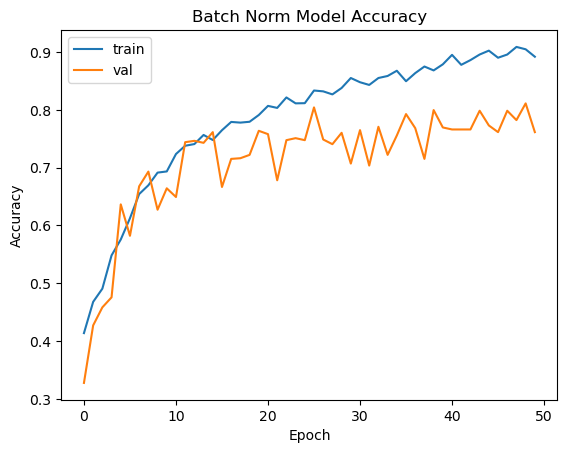

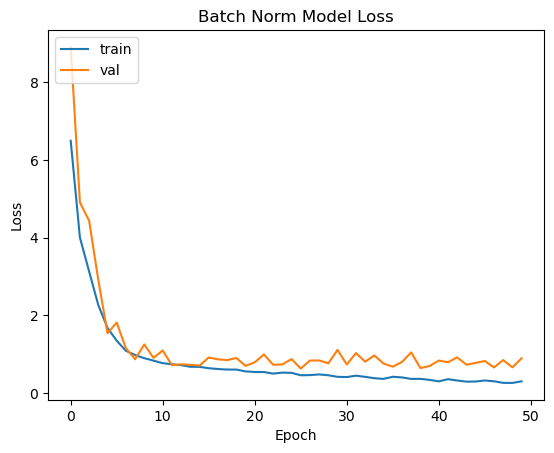

In [20]:
# plot the training and validation accuracy and loss at each epoch
import matplotlib.pyplot as plt

plt.plot(history_bn.history['accuracy'])
plt.plot(history_bn.history['val_accuracy'])
plt.title('Batch Norm Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history_bn.history['loss'])
plt.plot(history_bn.history['val_loss'])
plt.title('Batch Norm Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### **Based on the results of the regularized and batch normalized models, how effective are L1 or L2 regularization and batch normalization techniques? How do they impact the model's performance, convergence, size, and inference time?**

#### **Compare L2 regularization model to baseline model:**
**Performance:**
- Based on the results above, the best training and validation accuracy of L2 regularized model are around 0.72 and 0.72, which is worse than the baseline model (which are around 0.82 and 0.77). 

**Convergence:**
- Based on the accuracy and loss graph shown above, there is faster loss drop in baseline model. Without any regularization, the model is free to adjust its weights to minimize the loss as quickly as possible. This often leads to a steeper decrease in training loss.

- In opposite, there is slower and smoother loss drop in L2 regularized model. L2 regularization penalizes large weights, effectively adding a cost to the loss function. This means the model has to balance between fitting the data and keeping the weights small.

- The rate of convergence does not necessarily equate to the quality of convergence. Convergence should be gauged not just by the training loss but also by the validation loss. The L2 regularized model's slower and smoother descent is indicative of a more robust convergence process. It is finding a balance between fitting the data and not overfitting, leading to potentially better generalization on unseen data.

**Size:**
- L2 regularization does not directly reduce the number of parameters. Therefore, there is no impact on the model size.

**Inference time:**
- L2 regularization does not directly impact inference time.

#### **Compare Batch Normalization model to baseline model:**
**Performance:**
- Based on the results above, the best training and validation accuracy of model with batch normalization are around 0.90 and 0.81, which is better than the baseline model (which are around 0.82 and 0.77). This aligns with the expectation. Typically, adding batch normalization improves the model's performance. By normalizing the activations of each layer, it allows each layer to learn on a more stable distribution of inputs. This can lead to better generalization and less overfitting. Moreover, it can help the problem of vanishing gradient.

**Convergence:**
- Based on the accuracy and loss graph shown above, batch normalization can lead to faster convergence. By changing in the distribution of layer inputs during training, it allows for higher learning rates and reduces the sensitivity to the initial weight initialization. This can result in fewer epochs needed to reach a comparable performance.

- Without batch normalization, the model might require careful weight initialization and smaller learning rates to converge, especially for deeper networks. Training might also take longer.

**Size:**
- The model size increases slightly with batch normalization since it introduces additional parameters (gamma and beta for scaling and shifting) for each feature in the layers where it is applied. Additionally, it keeps track of the running mean and variance for each feature, which are used during inference.

**Inference time:**
- The inference time might be slightly longer with batch normalization since the model has to apply the normalization using the stored running mean and variance for each batch-normalized layer. However, in many practical scenarios, this increase is minimal and often overshadowed by the benefits batch normalization brings to model training and performance.

### **How do the learned weights of the L1 or L2 regularized models compare to the baseline model? Provide any insights on the differences in the learned weights and what it implies for the model's performance and interpretability?**

**Magnitude of Weights:**

L2 regularization penalizes large weights, so the learned weights in L2 regularized models tend to be smaller in magnitude compared to those in non-regularized models. This is because L2 regularization adds a term to the loss function that is proportional to the sum of the squared weights, making it costly for the model to have large weights.

**Performance and Overfitting:**

The constraint on the magnitude of the weights can lead to better generalization. By preventing weights from becoming too large, L2 regularization can help the model avoid fitting noise and outliers in the training data, reducing the risk of overfitting.

**Interpretability:**

Smaller weights can make the model more stable and potentially easier to interpret. When weights are bounded and do not take on extreme values, it is less likely that small changes in input will result in drastic changes in output.

#### **Compare the magnitude of the weights between L2 regularized model and baseline model.**

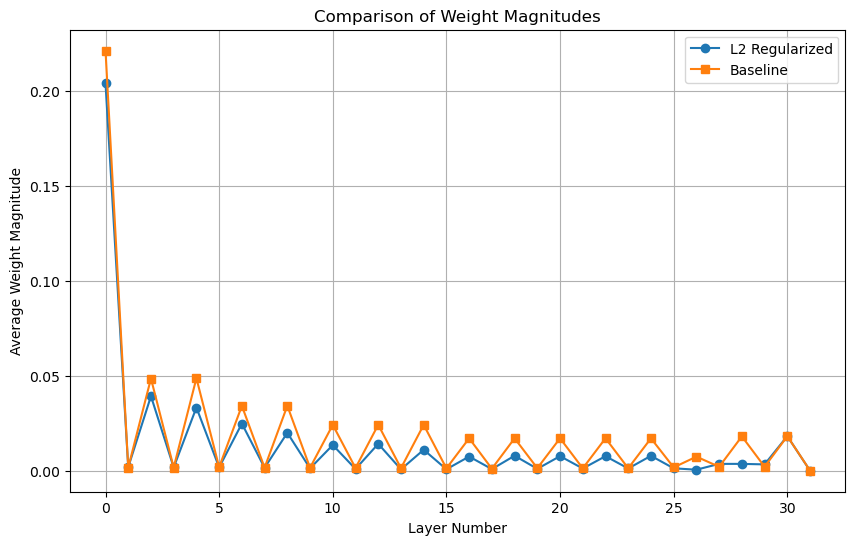

In [21]:
import tensorflow as tf

l2_model = tf.keras.models.load_model('best_model_l2.h5')
baseline_model = tf.keras.models.load_model('best_model_baseline.h5')

l2_weights = l2_model.get_weights()
baseline_weights = baseline_model.get_weights()

l2_magnitudes = [tf.reduce_mean(tf.abs(w)).numpy() for w in l2_weights]
baseline_magnitudes = [tf.reduce_mean(tf.abs(w)).numpy() for w in baseline_weights]

plt.figure(figsize=(10, 6))
plt.plot(l2_magnitudes, 'o-', label='L2 Regularized')
plt.plot(baseline_magnitudes, 's-', label='Baseline')
plt.xlabel('Layer Number')
plt.ylabel('Average Weight Magnitude')
plt.title('Comparison of Weight Magnitudes')
plt.legend()
plt.grid(True)
plt.show()

### **What insights can be drawn from the comprehensive analysis of the regularized and batch normalized models regarding the use of regularization and normalization techniques in training machine learning models?**

**Regularization (e.g., L2 Regularization) Insights:**

* Prevents Overfitting: Regularization techniques, like L2 regularization, add a penalty to the loss function based on the magnitude of the model parameters. This discourages the model from assigning too much importance to any single feature and helps prevent overfitting, especially in models with a large number of parameters.

* Weight Magnitude: Regularized models often have smaller weight magnitudes compared to non-regularized models. This can lead to more stable and interpretable models.

* Generalization: Regularized models often generalize better to unseen data as they are less prone to fitting noise and outliers in the training data.

* Performance: In my case, using L2 regularization leads to weaker performance in terms of accuracy compared to a non-regularized model. It may be caused by the lambda which controls the strength of the regularization is too high. It causes the model to become too simple and underfit the data. This means the model may not capture the underlying patterns in the training data effectively.

**Batch Normalization Insights:**

* Improves Convergence: Batch normalization can speed up convergence by addressing the internal covariate shift, making optimization landscapes smoother, and allowing the use of higher learning rates.

* Mitigates Vanishing/Exploding Gradient: By normalizing the activations, batch normalization can help mitigate issues like vanishing or exploding gradients, especially in deep networks. Initially, the given network architecture cannot be trained properly due to the problem of vanishing gradient. Batch normalization can help with this case.

* Performance Boost: Batch normalization can lead to performance improvements by ensuring each layer has a consistent and normalized input distribution. This can make the training process more stable and less sensitive to weight initialization. It improves the validation accuracy from 0.77 to 0.81 just by adding batch normalzation layers.

* Inference Overhead: While batch normalization provides several benefits during training, it introduces additional computations during inference. This can slightly increase the inference time.

**Combined Insights:**

* Synergy: Using both regularization and normalization can offer synergistic benefits. For instance, batch normalization can help in faster convergence, while regularization can help in achieving better generalization.

* Model Robustness: Combining these techniques can lead to more robust models that perform well across various datasets and are less sensitive to hyperparameter settings.

* Trade-offs: It is essential to understand the trade-offs. For instance, while batch normalization can speed up training, it might introduce slight overhead during inference.

### **By incorporating additional training strategies such as regularization techniques like dropout, data augmentation, and batch or layer normalization, can the accuracy of the model be improved?**

#### **Build models with dropout, L2 regularization and batch normalization**

In [22]:
#Step 7 implementation
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.initializers import he_normal

lambda_value = 0.001

model_l2_bn = Sequential([
    # First block
    Conv2D(64, (3, 3), padding='same', activation='selu', kernel_regularizer=l2(lambda_value), kernel_initializer=he_normal(), input_shape=(224, 224, 3)),
    Conv2D(64, (3, 3), padding='same', activation='selu', kernel_regularizer=l2(lambda_value), kernel_initializer=he_normal()),    
    MaxPooling2D(2, 2),
    BatchNormalization(),
    Dropout(0.2),

    Conv2D(128, (3, 3), padding='same', activation='selu', kernel_regularizer=l2(lambda_value), kernel_initializer=he_normal()),
    Conv2D(128, (3, 3), padding='same', activation='selu', kernel_regularizer=l2(lambda_value), kernel_initializer=he_normal()),    
    MaxPooling2D(2, 2),
    BatchNormalization(),    

    Conv2D(256, (3, 3), padding='same', activation='selu', kernel_regularizer=l2(lambda_value), kernel_initializer=he_normal()),
    Conv2D(256, (3, 3), padding='same', activation='selu', kernel_regularizer=l2(lambda_value), kernel_initializer=he_normal()),
    Conv2D(256, (3, 3), padding='same', activation='selu', kernel_regularizer=l2(lambda_value), kernel_initializer=he_normal()),    
    MaxPooling2D(2, 2),
    BatchNormalization(),
    Dropout(0.2),

    Conv2D(512, (3, 3), padding='same', activation='selu', kernel_regularizer=l2(lambda_value), kernel_initializer=he_normal()),
    Conv2D(512, (3, 3), padding='same', activation='selu', kernel_regularizer=l2(lambda_value), kernel_initializer=he_normal()),
    Conv2D(512, (3, 3), padding='same', activation='selu', kernel_regularizer=l2(lambda_value), kernel_initializer=he_normal()),
    MaxPooling2D(2, 2),
    BatchNormalization(),    

    Conv2D(512, (3, 3), padding='same', activation='selu', kernel_regularizer=l2(lambda_value), kernel_initializer=he_normal()),
    Conv2D(512, (3, 3), padding='same', activation='selu', kernel_regularizer=l2(lambda_value), kernel_initializer=he_normal()),
    Conv2D(512, (3, 3), padding='same', activation='selu', kernel_regularizer=l2(lambda_value), kernel_initializer=he_normal()),
    MaxPooling2D(2, 2),
    BatchNormalization(),
    Dropout(0.2),

    Flatten(),
    Dense(4096, activation='selu', kernel_regularizer=l2(lambda_value), kernel_initializer=he_normal()),
    Dense(4096, activation='selu', kernel_regularizer=l2(lambda_value), kernel_initializer=he_normal()),
    Dense(5, activation='softmax')
])

model_l2_bn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_39 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 conv2d_40 (Conv2D)          (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 112, 112, 64)      0         
 ng2D)                                                           
                                                                 
 batch_normalization_5 (Bat  (None, 112, 112, 64)      256       
 chNormalization)                                                
                                                                 
 dropout (Dropout)           (None, 112, 112, 64)      0         
                                                                 
 conv2d_41 (Conv2D)          (None, 112, 112, 128)    

In [23]:
from tensorflow.keras.callbacks import ModelCheckpoint
import time

checkpoint_filepath = 'best_model_l2_bn.h5'
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)


model_l2_bn.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

start_time = time.time()

e = 100
bs = 32

history_l2_bn = model_l2_bn.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // bs,
    epochs=e,
    validation_data=val_generator,
    validation_steps=val_generator.samples // bs,
    callbacks=[model_checkpoint_callback])

end_time = time.time()
print(f"Total training time of L2, batch normalization and dropout model: {end_time - start_time} seconds")

model_l2_bn.save('model_l2_bn.h5')

Epoch 1/100
107/107 [==============================] - 22s 163ms/step - loss: 31.5149 - accuracy: 0.3833 - val_loss: 34.7191 - val_accuracy: 0.3160
Epoch 2/100
107/107 [==============================] - 16s 146ms/step - loss: 28.7376 - accuracy: 0.4395 - val_loss: 28.5528 - val_accuracy: 0.4155
Epoch 3/100
107/107 [==============================] - 16s 145ms/step - loss: 27.6307 - accuracy: 0.4711 - val_loss: 28.2621 - val_accuracy: 0.5255
Epoch 4/100
107/107 [==============================] - 14s 134ms/step - loss: 27.0423 - accuracy: 0.5003 - val_loss: 26.7843 - val_accuracy: 0.4965
Epoch 5/100
107/107 [==============================] - 15s 144ms/step - loss: 26.0246 - accuracy: 0.5336 - val_loss: 25.5725 - val_accuracy: 0.5289
Epoch 6/100
107/107 [==============================] - 15s 135ms/step - loss: 25.1955 - accuracy: 0.5868 - val_loss: 25.5033 - val_accuracy: 0.5035
Epoch 7/100
107/107 [==============================] - 16s 146ms/step - loss: 24.7419 - accuracy: 0.6202 - val_l

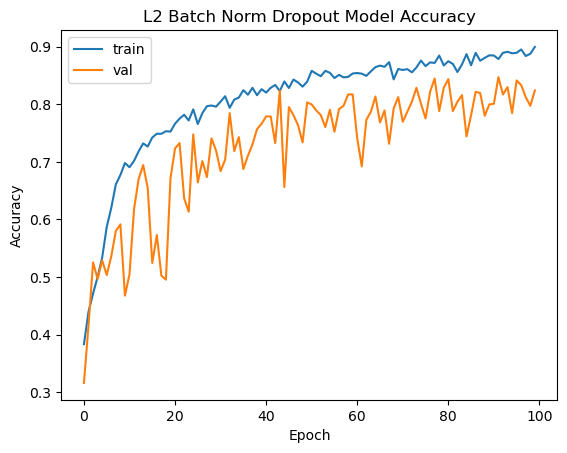

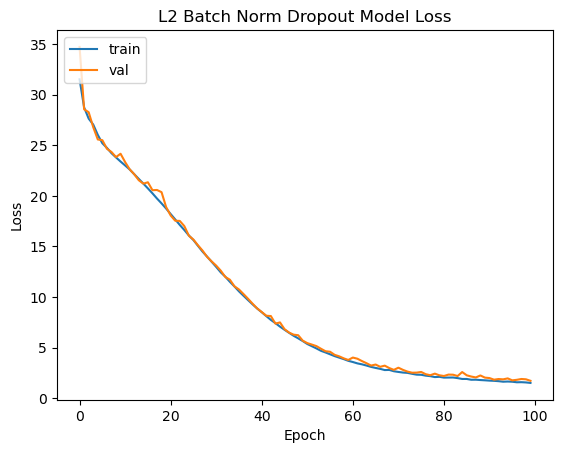

In [24]:
# plot the training and validation accuracy and loss at each epoch
import matplotlib.pyplot as plt

plt.plot(history_l2_bn.history['accuracy'])
plt.plot(history_l2_bn.history['val_accuracy'])
plt.title('L2 Batch Norm Dropout Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history_l2_bn.history['loss'])
plt.plot(history_l2_bn.history['val_loss'])
plt.title('L2 Batch Norm Dropout Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

#### **Result of using L2 regularization, batch normalization and dropout:**

* The model with L2 regularization, batch normalization and dropout outperform baseline model with best training accuracy around 0.90 and validation accuracy around 0.84 (baseline model is 0.82 and 0.77.)
* The model perform slightly better than the model with only using batch normalization (batch normalization only model is around 0.90 and 0.81). There is slight improvement adding regularization and dropout. Moreover, the training and validation loss converge smoother with regularization than the model with batch normalization only.


### **Modify the given model architecture to improve the accuracy over the baseline? You can modify the model architecture by adding or removing layers, changing the number of filters, or adding skip connections.**

#### **Try to modify the model architecture**

In [7]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Add, Activation, Flatten, Dense, Conv2D, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization, ZeroPadding2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.initializers import he_normal

lambda_value = 0.001

def identity_block(X, f, filters):
    F1, F2, F3 = filters
    
    X_shortcut = X
    
    X = Conv2D(filters=F1, kernel_size=(1, 1), strides=(1, 1), padding='valid', kernel_regularizer=l2(lambda_value), kernel_initializer=he_normal())(X)
    X = BatchNormalization(axis=3)(X)
    X = Activation('selu')(X)

    X = Conv2D(filters=F2, kernel_size=(f, f), strides=(1, 1), padding='same', kernel_regularizer=l2(lambda_value), kernel_initializer=he_normal())(X)
    X = BatchNormalization(axis=3)(X)
    X = Activation('selu')(X)

    X = Conv2D(filters=F3, kernel_size=(1, 1), strides=(1, 1), padding='valid', kernel_regularizer=l2(lambda_value), kernel_initializer=he_normal())(X)
    X = BatchNormalization(axis=3)(X)

    X = Add()([X, X_shortcut])
    X = Activation('selu')(X)

    return X

def convolutional_block(X, f, filters, s=2):
    F1, F2, F3 = filters

    X_shortcut = X

    X = Conv2D(F1, (1, 1), strides=(s, s), kernel_regularizer=l2(lambda_value), kernel_initializer=he_normal())(X)
    X = BatchNormalization(axis=3)(X)
    X = Activation('selu')(X)

    X = Conv2D(F2, (f, f), strides=(1, 1), padding='same', kernel_regularizer=l2(lambda_value), kernel_initializer=he_normal())(X)
    X = BatchNormalization(axis=3)(X)
    X = Activation('selu')(X)

    X = Conv2D(F3, (1, 1), strides=(1, 1), padding='valid', kernel_regularizer=l2(lambda_value), kernel_initializer=he_normal())(X)
    X = BatchNormalization(axis=3)(X)

    X_shortcut = Conv2D(F3, (1, 1), strides=(s, s), padding='valid', kernel_regularizer=l2(lambda_value), kernel_initializer=he_normal())(X_shortcut)
    X_shortcut = BatchNormalization(axis=3)(X_shortcut)

    X = Add()([X, X_shortcut])
    X = Activation('selu')(X)

    return X

input_shape = (224, 224, 3)
input_img = Input(shape=input_shape)

X = ZeroPadding2D((3, 3))(input_img)
X = Conv2D(64, (7, 7), strides=(2, 2), kernel_regularizer=l2(lambda_value), kernel_initializer=he_normal())(X)
X = BatchNormalization(axis=3)(X)
X = Activation('selu')(X)
X = MaxPooling2D((3, 3), strides=(2, 2))(X)

X = convolutional_block(X, f=3, filters=[64, 64, 256], s=1)
X = identity_block(X, 3, [64, 64, 256])
X = identity_block(X, 3, [64, 64, 256])
X = Dropout(0.2)(X)

X = convolutional_block(X, f=3, filters=[128, 128, 512])
X = identity_block(X, 3, [128, 128, 512])
X = Dropout(0.2)(X)
X = identity_block(X, 3, [128, 128, 512])
X = identity_block(X, 3, [128, 128, 512])
X = Dropout(0.2)(X)

X = convolutional_block(X, f=3, filters=[256, 256, 1024])
X = identity_block(X, 3, [256, 256, 1024])
X = identity_block(X, 3, [256, 256, 1024])
X = Dropout(0.2)(X)
X = identity_block(X, 3, [256, 256, 1024])
X = identity_block(X, 3, [256, 256, 1024])
X = identity_block(X, 3, [256, 256, 1024])
X = Dropout(0.2)(X)

X = convolutional_block(X, f=3, filters=[512, 512, 2048])
X = identity_block(X, 3, [512, 512, 2048])
X = identity_block(X, 3, [512, 512, 2048])

X = GlobalAveragePooling2D()(X)
Dense(4096, activation='selu', kernel_regularizer=l2(lambda_value), kernel_initializer=he_normal()),
Dense(4096, activation='selu', kernel_regularizer=l2(lambda_value), kernel_initializer=he_normal()),
X = Dense(5, activation='softmax')(X)

model_res = Model(inputs=input_img, outputs=X)

model_res.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 zero_padding2d_2 (ZeroPadd  (None, 230, 230, 3)          0         ['input_3[0][0]']             
 ing2D)                                                                                           
                                                                                                  
 conv2d_64 (Conv2D)          (None, 112, 112, 64)         9472      ['zero_padding2d_2[0][0]']    
                                                                                                  
 batch_normalization_64 (Ba  (None, 112, 112, 64)         256       ['conv2d_64[0][0]']     

In [9]:
from tensorflow.keras.callbacks import ModelCheckpoint
import time

checkpoint_filepath = 'best_model_res.h5'
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)


model_res.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

start_time = time.time()

e = 100
bs = 32

history_res = model_res.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // bs,
    epochs=e,
    validation_data=val_generator,
    validation_steps=val_generator.samples // bs,
    callbacks=[model_checkpoint_callback])

end_time = time.time()
print(f"Total training time of Residual Net model: {end_time - start_time} seconds")

model_res.save('model_res.h5')

Epoch 1/100
107/107 [==============================] - 27s 146ms/step - loss: 53.4754 - accuracy: 0.4784 - val_loss: 56.7499 - val_accuracy: 0.2627
Epoch 2/100
107/107 [==============================] - 16s 145ms/step - loss: 51.2887 - accuracy: 0.5325 - val_loss: 50.8343 - val_accuracy: 0.4884
Epoch 3/100
107/107 [==============================] - 15s 142ms/step - loss: 49.1894 - accuracy: 0.5564 - val_loss: 49.7973 - val_accuracy: 0.4225
Epoch 4/100
107/107 [==============================] - 15s 141ms/step - loss: 47.0829 - accuracy: 0.6091 - val_loss: 46.8187 - val_accuracy: 0.4502
Epoch 5/100
107/107 [==============================] - 15s 142ms/step - loss: 45.0530 - accuracy: 0.6219 - val_loss: 45.9191 - val_accuracy: 0.4051
Epoch 6/100
107/107 [==============================] - 16s 145ms/step - loss: 43.0858 - accuracy: 0.6465 - val_loss: 43.0949 - val_accuracy: 0.5104
Epoch 7/100
107/107 [==============================] - 16s 145ms/step - loss: 41.1907 - accuracy: 0.6550 - val_l

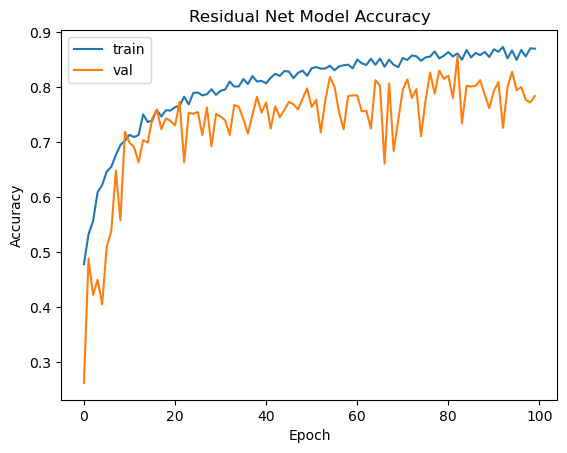

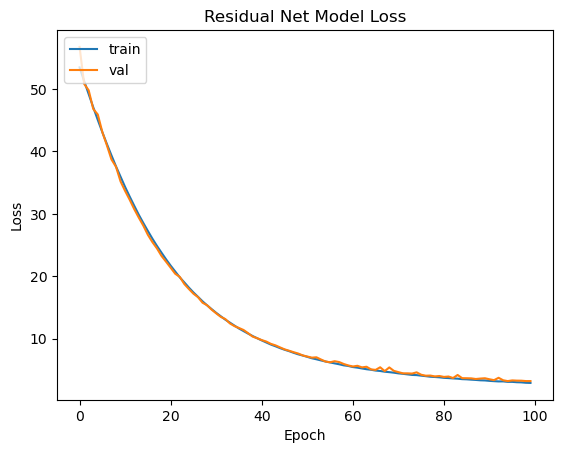

In [10]:
# plot the training and validation accuracy and loss at each epoch
import matplotlib.pyplot as plt

plt.plot(history_res.history['accuracy'])
plt.plot(history_res.history['val_accuracy'])
plt.title('Residual Net Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history_res.history['loss'])
plt.plot(history_res.history['val_loss'])
plt.title('Residual Net Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

#### **Result of modification of model**

* The model is modified by adding residual connection and like ResNet. It outperform baseline model with best training accuracy around 0.87 and validation accuracy around 0.85 (baseline model is 0.82 and 0.77.)

* The model perform similiar to the model with L2 regularization, batch normalization and dropout (L2, batch normalization and dropout model is around 0.90 and 0.84). There is very slight improvement by adding residual connection.

### **Use transfer learning to fine-tune an existing pre-trained model to improve accuracy?  What approach will you use for transfer learning: feature extraction or fine-tuning and why?**

I would choose feature extraction approach. The choice between feature extraction and fine-tuning depends on the size and similarity of our dataset relative to the dataset the model was pre-trained on. Given the flower dataset, it is not too large and is somewhat similar to general ImageNet classes (which includes various plants and flowers), starting with feature extraction would be a good approach.

In [28]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras import Input
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout

base_model = InceptionV3(include_top=False, weights='imagenet', input_shape=(224, 224, 3))

for layer in base_model.layers:
    layer.trainable = False

model_transfer = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(1024, activation='relu'),
    Dropout(0.5),
    Dense(5, activation='softmax'),
])

87910968/87910968 [==============================] - 12s 0us/step


In [29]:
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
import time

checkpoint_filepath = 'best_model_transfer.h5'
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)


for layer in base_model.layers[-20:]:
    layer.trainable = True

model_transfer.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

start_time = time.time()

e = 25
bs = 32

history_transfer = model_transfer.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // bs,
    epochs=e,
    validation_data=val_generator,
    validation_steps=val_generator.samples // bs,
    callbacks=[model_checkpoint_callback])

end_time = time.time()
print(f"Total training time of transfer learning model: {end_time - start_time} seconds")

model_transfer.save('model_transfer.h5')

Epoch 1/25
107/107 [==============================] - 18s 144ms/step - loss: 0.7215 - accuracy: 0.7550 - val_loss: 0.4529 - val_accuracy: 0.8449
Epoch 2/25
107/107 [==============================] - 15s 137ms/step - loss: 0.4238 - accuracy: 0.8503 - val_loss: 0.3217 - val_accuracy: 0.9016
Epoch 3/25
107/107 [==============================] - 15s 135ms/step - loss: 0.3431 - accuracy: 0.8763 - val_loss: 0.4199 - val_accuracy: 0.8738
Epoch 4/25
107/107 [==============================] - 15s 137ms/step - loss: 0.3009 - accuracy: 0.8944 - val_loss: 0.3264 - val_accuracy: 0.8912
Epoch 5/25
107/107 [==============================] - 14s 135ms/step - loss: 0.2664 - accuracy: 0.9015 - val_loss: 0.3455 - val_accuracy: 0.8854
Epoch 6/25
107/107 [==============================] - 15s 136ms/step - loss: 0.2542 - accuracy: 0.9096 - val_loss: 0.3963 - val_accuracy: 0.8866
Epoch 7/25
107/107 [==============================] - 15s 138ms/step - loss: 0.2252 - accuracy: 0.9190 - val_loss: 0.3741 - val_ac

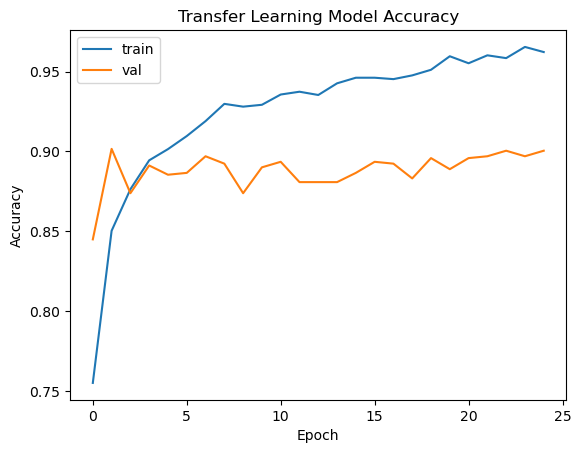

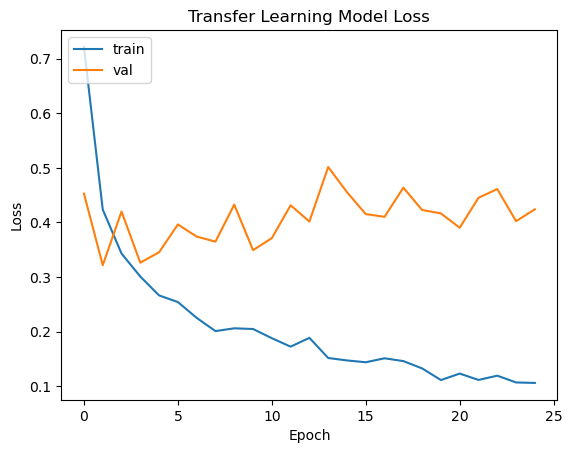

In [30]:
# plot the training and validation accuracy and loss at each epoch
import matplotlib.pyplot as plt

plt.plot(history_transfer.history['accuracy'])
plt.plot(history_transfer.history['val_accuracy'])
plt.title('Transfer Learning Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history_transfer.history['loss'])
plt.plot(history_transfer.history['val_loss'])
plt.title('Transfer Learning Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

#### **Result of using Transfer Learning Model**

* The model is using transfer learning model (base model is InceptionV3). It outperform all the models tested above including L2, batch normalization, skip connection, etc. with best training accuracy around 0.96 and validation accuracy around 0.90 (baseline model is 0.82 and 0.77.)

* The transfer learning approach, leveraging the pre-trained InceptionV3 model, has demonstrated superior performance on the flower dataset. With a remarkable accuracy over 0.90, it is evident that utilizing knowledge from pre-existing models trained on large datasets (like ImageNet) can significantly boost the performance on specific tasks, even when the target dataset is relatively smaller or different in nature.

* Transfer learning not only improves performance but also reduces the training time. Instead of learning all the intricate features from scratch, the model fine-tunes pre-learned features, leading to quicker convergence.